# A.&nbsp;One-Dimensional GPR Model

We begin by defining a training dataset $D=\left\{\left(x_i, y_i\right) \mid y_i = f(x_i) + \epsilon_i, \epsilon_i \sim N(0, \sigma^2), i=0, \ldots, n\right\}$, where $n$ denotes the number of observations, and $\epsilon_i$ represents the noise term added to each observation. In Gaussian Process Regression (GPR), we model the joint distribution of observed outputs $\mathbf{Y}=\left[y_1, \ldots, y_n\right]^T$ and the predicted output $y_*$ for a new input $x_*$ as a multivariate Gaussian distribution. The joint distribution of observed and predicted outputs given the inputs is expressed as<sup>[1]</sup>:

$$
p\left(\begin{array}{c}
y_1 \\
\vdots \\
y_n \\
y_*
\end{array}\right) \left\lvert\,\left(\begin{array}{llll}
x_1 & \ldots & x_n & x_*
\end{array}\right) \sim N(\boldsymbol{\mu}, \boldsymbol{\Sigma})\right.
$$

where $\boldsymbol{\mu}$ is the mean vector and $\boldsymbol{\Sigma}$ is the covariance matrix. The covariance matrix components are computed using a kernel function $k$, which measures the similarity between inputs. Specifically, the elements of the covariance matrix are defined as $\Sigma_{i j}=k\left(x_i, x_j\right) + \sigma^2 \delta_{ij}$ for $i, j \in$ $\{1, \ldots, n, *\}$.<br>

Given the observed data points, we can compute the predictive distribution for a new output $y_*$ at a new input $x_*$, which is also normally distributed:

$$
p\left(y_* \mid y_1, \ldots, y_n, x_1, \ldots, x_n, x_*\right) \sim N\left(\mathbf{K}_*^T \mathbf{K}^{-1} \mathbf{Y}, \mathbf{K}_{* *}-\mathbf{K}_*^T \mathbf{K}^{-1} \mathbf{K}_*\right)
$$

where:
- $\mathbf{K}$ is the covariance matrix computed between all training inputs,
- $\mathbf{K}_*$ is a vector of covariances between the training inputs and the new(test) input $x_*$,
- $\mathbf{K}_{* *}$ is the variance of the new(test) input $x_*$.

The term $\mathbf{K}_*^T \mathbf{K}^{-1} \mathbf{Y}$ represents the kernel regression of the outputs, providing the mean prediction of $y_*$ based on the linear combination of observed outputs weighted by their covariances with $x_*$. The term $\mathbf{K}_{* *}-\mathbf{K}_*^T \mathbf{K}^{-1} \mathbf{K}_*$ gives the predictive variance, indicating the uncertainty of the prediction at $x_*$.

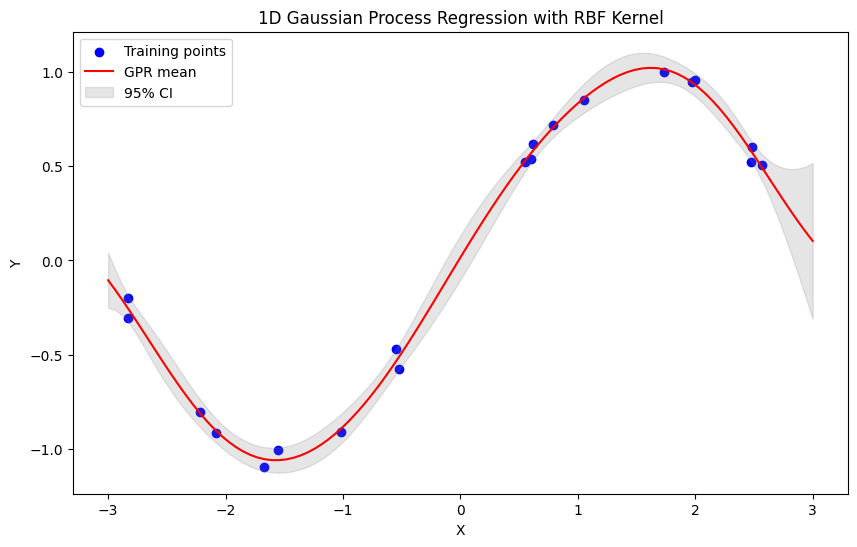

In [1]:
# @title Click for details
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image, display

# Generate sample data
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05 # the observations Y include some noise
data = pd.DataFrame(np.hstack((X,Y)),columns=['X','Y'])

# Define the RBF kernel
def RBF_kernel_1(x1,x2,sigma=1.0):
    return np.exp(-np.linalg.norm(x1-x2)**2/(2*sigma**2))

sigma_noise = 0.05 # noise level, account for observation noise in the model
d = X.size
K = np.zeros((d,d)) # kernelized
for i in range(d):
    for j in range(d):
        K[i,j] = RBF_kernel_1(X[i],X[j])

# Add noise variance to the diagonal
K += sigma_noise**2*np.eye(d)

# Test inputs for prediction
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
K_test = np.zeros((100, d))
for i in range(100):
  for j in range(d):
    K_test[i,j] = RBF_kernel_1(X_test[i],X[j])

# Compute predictive mean
K_inv = np.linalg.inv(K)
mu_test = K_test@(K_inv)@(Y)
# Compute predictive variance
K_test_test = np.zeros((100, 100))
for i in range(100):
  for j in range(100):
    K_test_test[i,j] = RBF_kernel_1(X_test[i, 0],X_test[j, 0])

var_test = K_test_test - K_test@(K_inv)@(K_test.T)
std_test = np.sqrt(np.diag(var_test))

# Plotting the training points
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Training points')

# Plotting the predictive mean
plt.plot(X_test, mu_test, color='red', label='GPR mean')

# Plotting the 95% CI
plt.fill_between(X_test.ravel(),
                 mu_test.ravel() - 2 * std_test,
                 mu_test.ravel() + 2 * std_test,
                 color='gray', alpha=0.2, label='95% CI')

plt.title('1D Gaussian Process Regression with RBF Kernel')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

The dynamic demonstration of 1D Gaussian process regression from the previous example is reproduced using Matlab, showcasing the entire update process. Note that these are two separate generations of sample data, so the training points will differ from the Colab case. The Matlab code 'gpr_onedim_demo.m' is also included.

Mounted at /content/drive


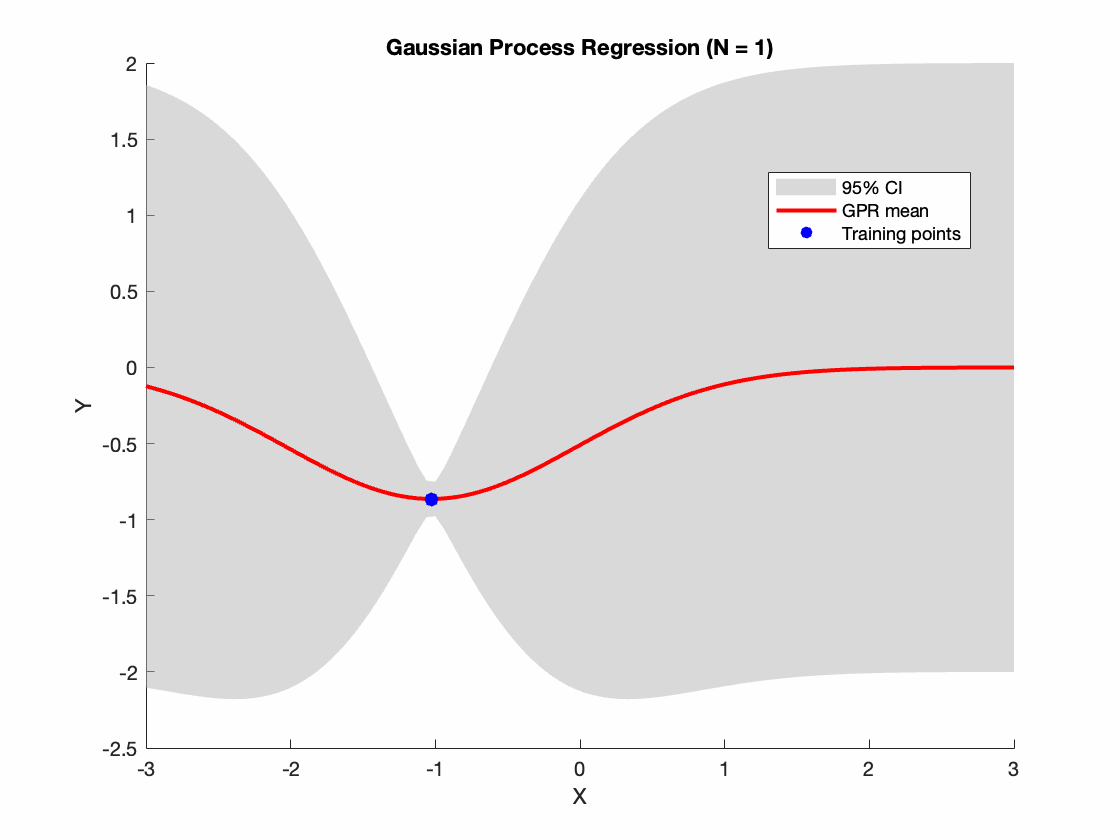

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
display(Image(filename='/content/drive/MyDrive/Colab Notebooks/new2GPR/simple_gpr_gif_demo/gpr_onedim_demo.gif')) # change to github address

In [ ]:
%reset -f
# Clear all previously defined variables and functions

# B.&nbsp;Two-Dimensional GPR Model

We extend the concept of Gaussian Process Regression (GPR) to a two-dimensional input space. Consider a training dataset $D=\left\{\left(\mathbf{x}^{(i)} = (x_1^{(i)}, x_2^{(i)}), y_i\right) \mid y_i=f(x_1^{(i)}, x_2^{(i)})+\epsilon_i, \epsilon_i \sim N(0,\sigma^2), i=0, \ldots, n\right\}$, where each $\mathbf{x}^{(i)}$ is now a vector in $\mathbb{R}^2$, and $\epsilon_i$ represents the noise term added to each observation. This setup allows modeling more complex phenomena that depend on two variables.

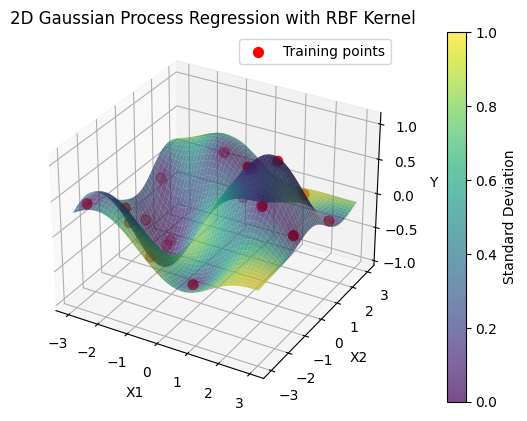

In [ ]:
# @title Click for details
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, norm

# Generate sample data
X = -3 + 6 * np.random.rand(20, 2)
Y = np.sin(X[:, 0]) * np.cos(X[:, 1]) + 0.05 * np.random.randn(20)  # Observations Y include some noise
n = len(X)

# Define the RBF kernel
def RBF_kernel_1(x1, x2, sigma=1.0):
    return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * sigma**2))

# Compute the full kernel
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = RBF_kernel_1(X[i], X[j])

K += 0.05**2 * np.eye(n) # refer to the 1D case

# Test inputs for prediction
X1_test_grid, X2_test_grid = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
X_test = np.column_stack([X1_test_grid.ravel(), X2_test_grid.ravel()])
m_test = len(X_test)

# Kernel between test points and training points
K_test = np.zeros((m_test, n))
for k in range(m_test):
    for j in range(n):
        K_test[k, j] = RBF_kernel_1(X_test[k], X[j])

# Precompute diagonal of K_test_test / For RBF exp(0)=1
k_test_test = np.ones(m_test)

K_inv = inv(K)
mu_test = K_test @ K_inv @ Y  # Compute predictive mean
var_test = k_test_test - np.sum(K_test @ K_inv * K_test, axis=1)  # Compute predictive variance
std_test = np.sqrt(var_test)

# Reshape for plotting
mu_test_grid = mu_test.reshape(X1_test_grid.shape)
std_test_grid = std_test.reshape(X1_test_grid.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1_test_grid, X2_test_grid, mu_test_grid, facecolors=plt.cm.viridis(std_test_grid / std_test_grid.max()), edgecolor='none', alpha=0.7) # '/' for normalization
cbar = fig.colorbar(surf, ax=ax, pad=0.1)
cbar.set_label('Standard Deviation')

# Plot of training points
ax.scatter(X[:, 0], X[:, 1], Y, color='r', s=50, label='Training points')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('2D Gaussian Process Regression with RBF Kernel')
ax.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
display(Image(filename='/content/drive/MyDrive/Colab Notebooks/new2GPR/simple_gpr_gif_demo/gpr_twodim_demo.gif')) # change to github address

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
%reset -f
# Clear all previously defined variables and functions

# C.&nbsp;Multi-Output Gaussian Processes (MOGPs)

Defining a training dataset where each observation consists of an input $x \in \mathbb{R}$ and two correlated outputs $y$ and $z$. Specifically, the dataset $D$ is given by:

$$
D=\left\{\left(x_i, \mathbf{o}_i\right) \left\lvert\, \mathbf{o}_i=\binom{y_i}{z_i}\right., y_i=\sin \left(x_i\right)+\epsilon_{y_i}, z_i=0.5 y_i+0.2 x_i+\epsilon_{z_i}, i=0, \ldots, n\right\}
$$

where $\epsilon_{y_i}$ and $\epsilon_{z_i}$ are independent noise terms added to the outputs $y$ and $z$, with $\epsilon_{y_i} \sim N\left(0, \sigma_y^2\right)$ and $\epsilon_{z_i} \sim N\left(0, \sigma_z^2\right)$.

For Multi-Output Gaussian Process Regression, we model the joint distribution of the observed outputs $\mathbf{o}_i$ for all inputs as samples from a multivariate Gaussian process. This process is fully defined by a mean function $\boldsymbol{\mu}$ and a block-structured covariance function $\boldsymbol{\Sigma}$<sup>[2]</sup>, where each block describes the covariance between the outputs as well as across different inputs. The covariance matrix for a single pair of inputs $x_i$ and $x_j$ is given by:

$$
\boldsymbol{\Sigma}_{i j}=\left(\begin{array}{ll}
k_{y y}\left(x_i, x_j\right) & k_{y z}\left(x_i, x_j\right) \\
k_{z y}\left(x_i, x_j\right) & k_{z z}\left(x_i, x_j\right)
\end{array}\right)+\left(\begin{array}{cc}
\sigma_y^2 \delta_{i j} & 0 \\
0 & \sigma_z^2 \delta_{i j}
\end{array}\right)
$$
where $k_{y y}, k_{y z}, k_{z y}$, and $k_{z z}$ are the kernel functions that define the covariance between the different outputs and inputs. Still, the predictive distribution for a new output $\mathbf{o}_*$ at a new input $x_*$, which is also normally distributed:<br>
$$p\left(\mathbf{o}_* \mid \mathbf{o}_1, \ldots, \mathbf{o}_n, x_1, \ldots, x_n, x_*\right) \sim N\left(\mathbf{K}_*^T \mathbf{K}^{-1} \mathbf{O}, \mathbf{K}_{* *} - \mathbf{K}_*^T \mathbf{K}^{-1} \mathbf{K}_*\right)$$

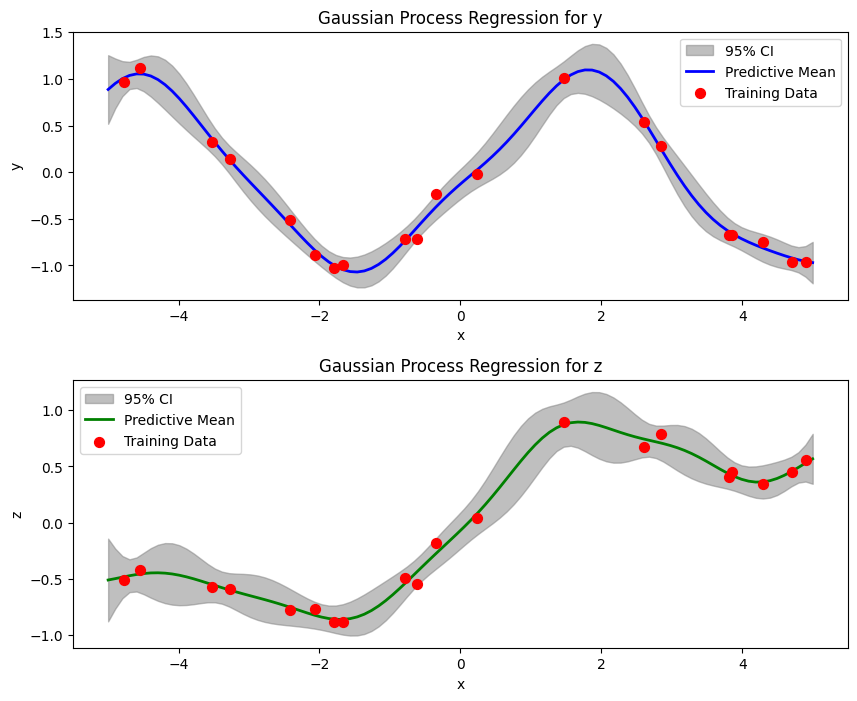

In [ ]:
# @title Click for details
import numpy as np
import matplotlib.pyplot as plt

# Generate Sample Data
N_total = 20  # num of data points
x_full = -5 + 10 * np.random.rand(N_total, 1)
sigma_y = 0.1  # Noise std for y
sigma_z = 0.1  # Noise std for z

# Output z & y independent
y_full = np.sin(x_full) + sigma_y * np.random.randn(N_total, 1)
z_full = 0.5 * y_full + 0.2 * x_full + sigma_z * np.random.randn(N_total, 1)

# Test inputs for prediction
x_test = np.linspace(-5, 5, 100).reshape(-1, 1)
N_test = len(x_test)

# Define the RBF Kernel Function
def RBF_kernel_2(x1, x2, sigma_f = 1.0, l = 1.0):
    return sigma_f**2 * np.exp(-((x1 - x2)**2) / (2 * l**2))

# Compute kernel between training points
K_xx = np.zeros((N_total, N_total))
for i in range(N_total):
    for j in range(N_total):
        K_xx[i, j] = RBF_kernel_2(x_full[i, 0], x_full[j, 0])

# Add noise variance to the kernel
K_y = K_xx + sigma_y**2 * np.eye(N_total)  # For output y
K_z = K_xx + sigma_z**2 * np.eye(N_total)  # For output z

# Compute kernel between training and test points
K_xs = np.zeros((N_total, N_test))
for i in range(N_total):
    for j in range(N_test):
        K_xs[i, j] = RBF_kernel_2(x_full[i, 0], x_test[j, 0])

# Predictive mean and var for y
mu_y = K_xs.T @ np.linalg.solve(K_y, y_full)
K_ss = np.zeros((N_test, N_test))
for i in range(N_test):
    for j in range(N_test):
        K_ss[i, j] = RBF_kernel_2(x_test[i, 0], x_test[j, 0])
var_y = np.diag(K_ss - K_xs.T @ np.linalg.solve(K_y, K_xs))

# Predictive mean and var for z
mu_z = K_xs.T @ np.linalg.solve(K_z, z_full)
var_z = np.diag(K_ss - K_xs.T @ np.linalg.solve(K_z, K_xs))

# Plot the results
plt.figure(figsize=(10, 8))
plt.subplots_adjust(hspace=0.3)

# Plot for y
plt.subplot(2, 1, 1)
plt.fill_between(x_test.flatten(), (mu_y + 2*np.sqrt(var_y.reshape(-1,1))).flatten(), (mu_y - 2*np.sqrt(var_y.reshape(-1,1))).flatten(), color='gray', alpha=0.5)
plt.plot(x_test, mu_y, 'b-', linewidth=2)
plt.scatter(x_full, y_full, c='r', s=50, zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian Process Regression for y')
plt.legend(['95% CI', 'Predictive Mean', 'Training Data'], loc='best')

# Plot for z
plt.subplot(2, 1, 2)
plt.fill_between(x_test.flatten(), (mu_z + 2*np.sqrt(var_z.reshape(-1,1))).flatten(), (mu_z - 2*np.sqrt(var_z.reshape(-1,1))).flatten(), color='gray', alpha=0.5)
plt.plot(x_test, mu_z, 'g-', linewidth=2)
plt.scatter(x_full, z_full, c='r', s=50, zorder=5)
plt.xlabel('x')
plt.ylabel('z')
plt.title('Gaussian Process Regression for z')
plt.legend(['95% CI', 'Predictive Mean', 'Training Data'], loc='best')

plt.show()

Mounted at /content/drive


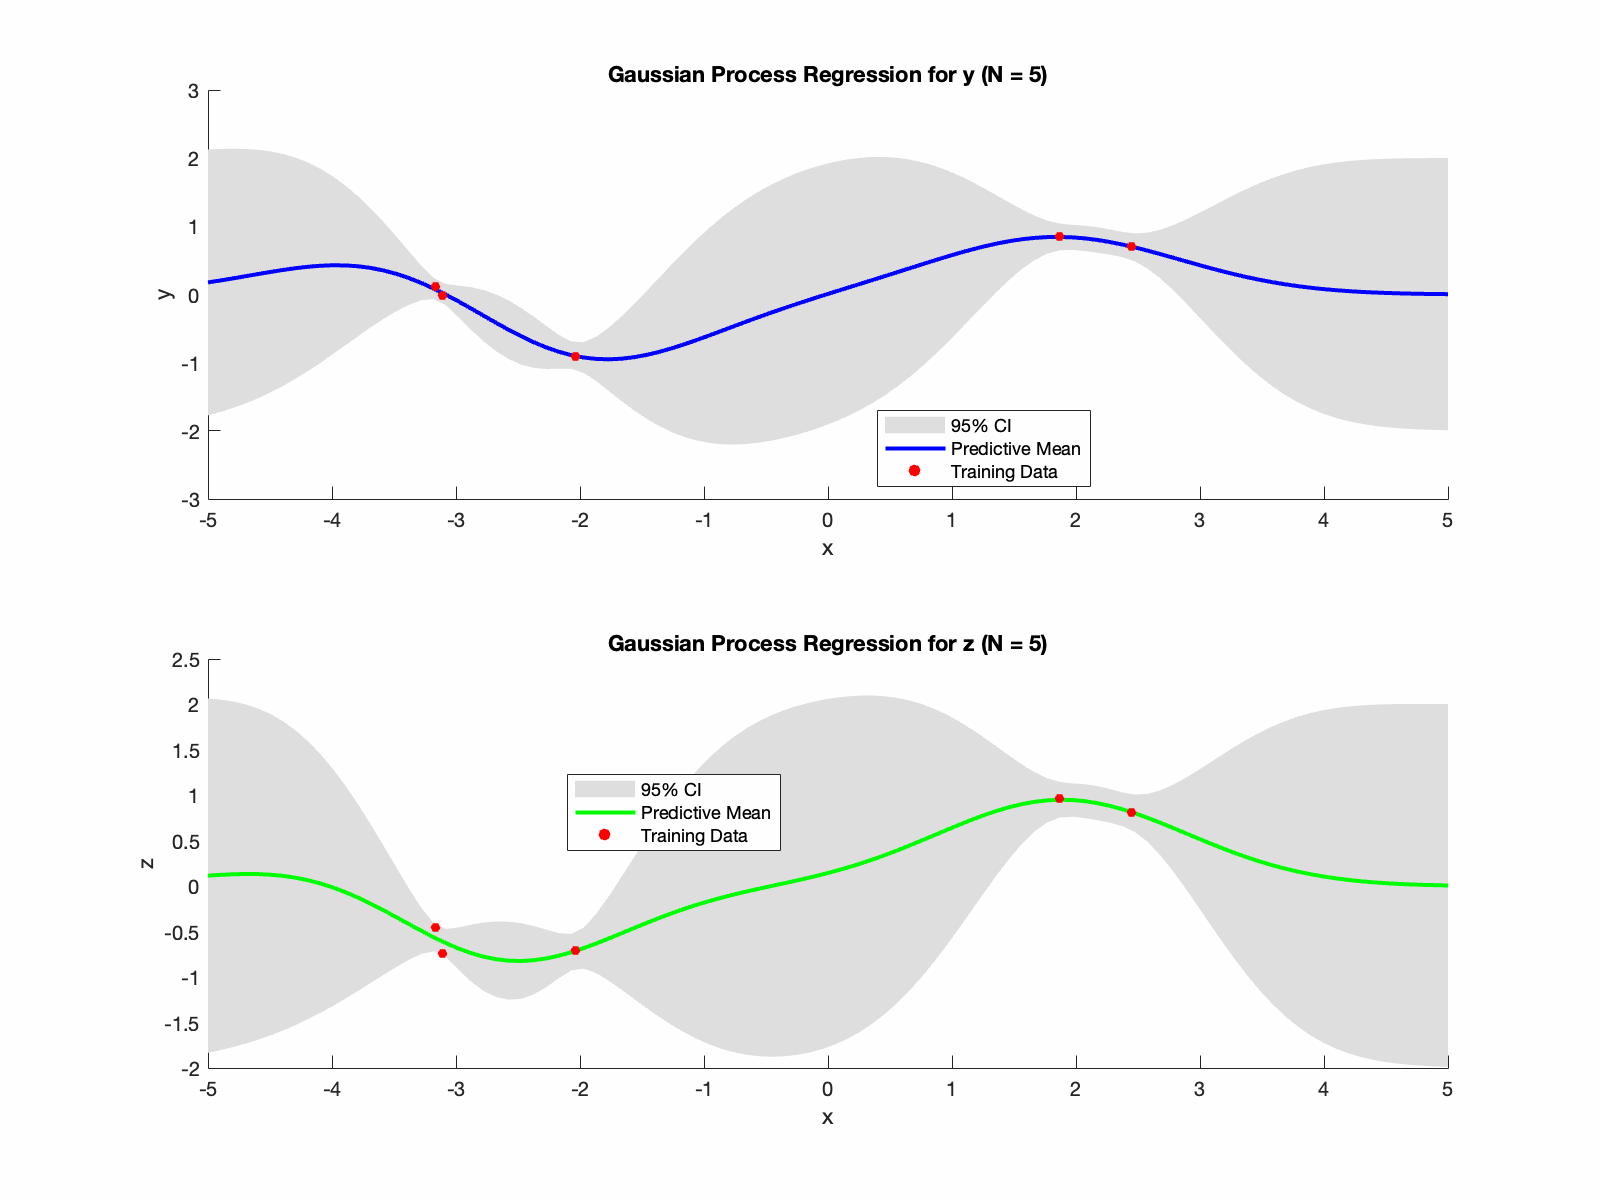

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
display(Image(filename='/content/drive/MyDrive/Colab Notebooks/new2GPR/simple_gpr_gif_demo/mogp_indep_demo.gif')) # change to github address

The above top-down structure is very helpful for understanding how Gaussian process regression is actually performed. However, we need to modify this structure to be more object-oriented, enabling us to optimize kernel hyperparameters, manage noise, and much more.

# Reference

[1]&nbsp;CORNELL CS4780 "Machine Learning for Intelligent Systemshttps://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote15.html;<br>
[2]&nbsp;Williams, C. K., & Rasmussen, C. E. (2006). [Gaussian processes for machine learning](https://direct.mit.edu/books/monograph/2320/Gaussian-Processes-for-Machine-Learning) (Vol. 2, No. 3, p. 4). Cambridge, MA: MIT press<br>
[3]&nbsp;CORNELL CS4780 "Machine Learning for Intelligent Systemshttps://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote14.html;

**Disclaimer:**<br>
[1]&nbsp;This project is not intended for commercial use; it is solely for the purpose of showcasing my personal learning journey and aims to assist others who are passionate about learning. All materials included are appropriately credited to the original content creators through **links** or **citations**;<br>
[2]&nbsp;Generative AI is utilized for text editing, code review, and related purposes.<br>